In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
data = pd.read_csv(r'C:\Users\ASUS\Downloads\Class01_data\data/diabetes.csv')

In [25]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
data.drop("Outcome", axis = 1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
103,1,81,72,18,40,26.6,0.283,24
104,2,85,65,0,0,39.6,0.930,27
105,1,126,56,29,152,28.7,0.801,21
106,1,96,122,0,0,22.4,0.207,27


In [28]:
y = data["Outcome"]
y


0      1
1      0
2      1
3      0
4      1
      ..
103    0
104    0
105    0
106    0
107    0
Name: Outcome, Length: 108, dtype: int64

In [30]:
import numpy as np

In [31]:
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']
# for col in zero_not_accepted:
#     for i in data[col]:
#         if i==0:
#             colSum = sum(data[col])
#             meanCol=colSum/len(data[col])
#             data[col]=meanCol

for col in zero_not_accepted:
    data[col]= data[col].replace(0,np.NaN)
    mean = int(data[col].mean(skipna=True))
    data[col] = data[col].replace(np.NaN,mean)


In [33]:
# extracting independent variables

X = data.iloc[:,0:8]
# extracting dependent variable
X


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,161.0,33.6,0.627,50
1,1,85.0,66.0,29.0,161.0,26.6,0.351,31
2,8,183.0,64.0,29.0,161.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
103,1,81.0,72.0,18.0,40.0,26.6,0.283,24
104,2,85.0,65.0,29.0,161.0,39.6,0.930,27
105,1,126.0,56.0,29.0,152.0,28.7,0.801,21
106,1,96.0,122.0,29.0,161.0,22.4,0.207,27


In [36]:
y = data.iloc[:,8]
# Explorning data to know relation before processing

In [37]:
y


0      1
1      0
2      1
3      0
4      1
      ..
103    0
104    0
105    0
106    0
107    0
Name: Outcome, Length: 108, dtype: int64

In [39]:
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [41]:
import matplotlib as plt

<Axes: xlabel='Age', ylabel='count'>

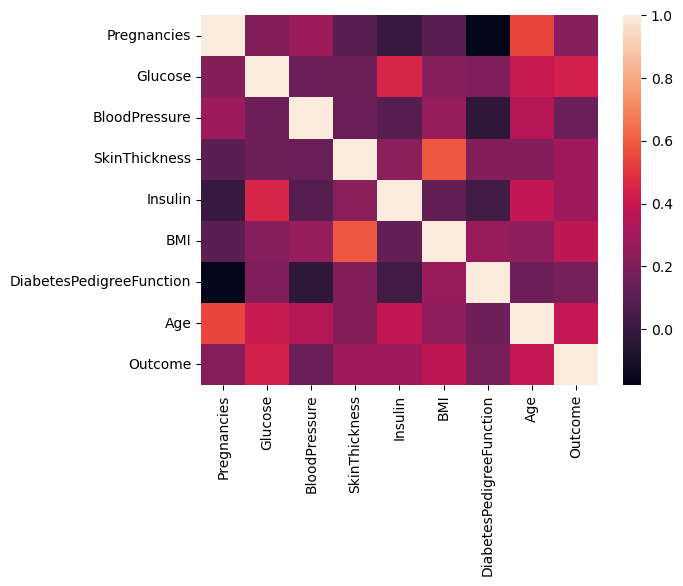

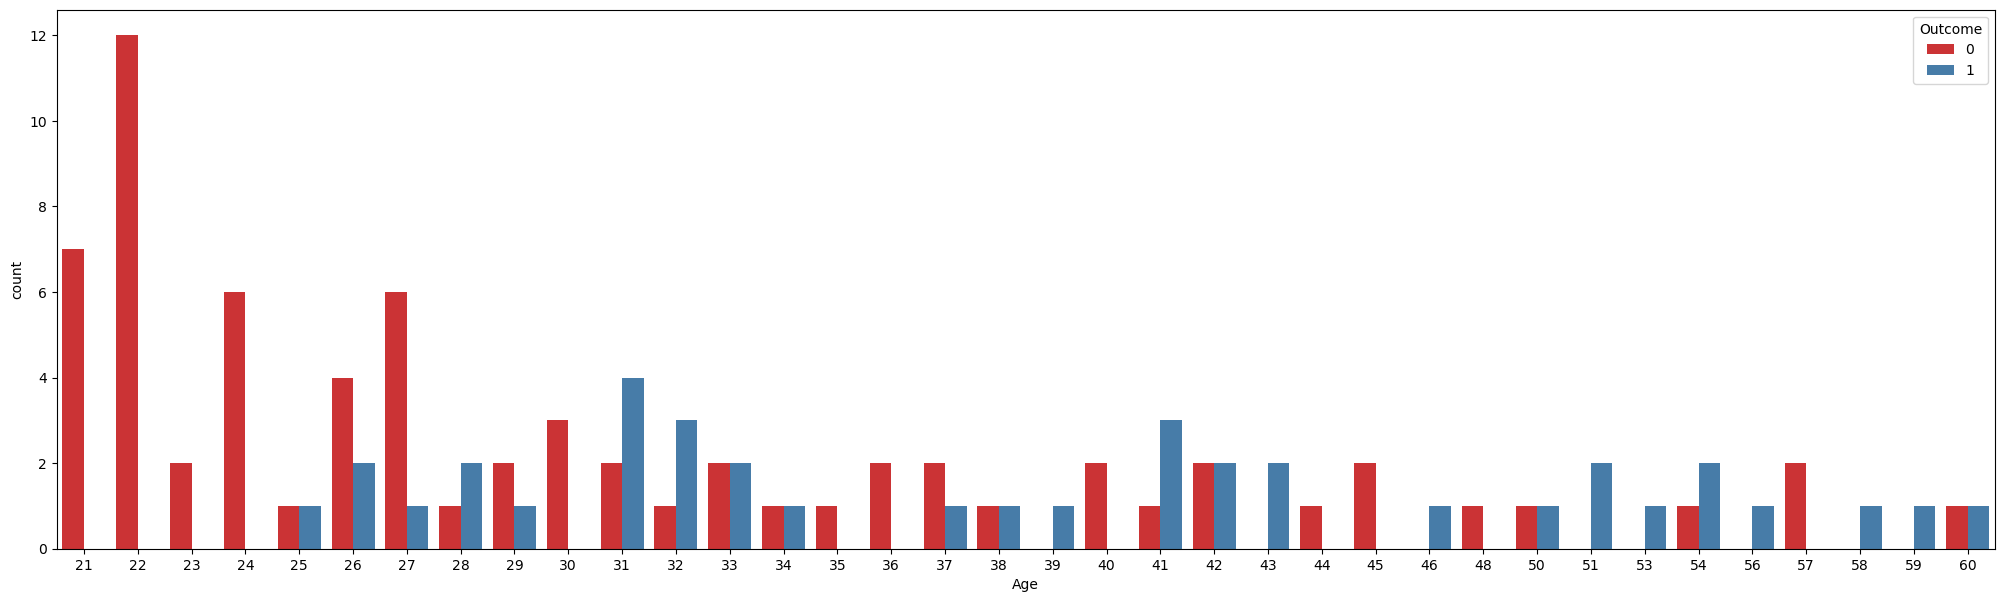

In [44]:
# Explorning data to know relation before processing

sns.heatmap(data.corr())

plt.figure(figsize=(25,7))
sns.countplot(x='Age',hue='Outcome',data=data,palette='Set1')


In [45]:
# splitting dataset into training and testing set


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [46]:
# feature scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [47]:
# loading model - KNN

classifier = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

In [48]:
# fitting model

classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [49]:
#predictions

y_pred = classifier.predict(X_test)


In [50]:
# evaluating model

conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
print(f1_score(y_test,y_pred))

[[10  3]
 [ 4  5]]
0.5882352941176471


In [51]:
# accuracy

print(accuracy_score(y_test,y_pred))

plt.show()

0.6818181818181818
